# Electoral Bonds

Electoral Bond was a mode of funding to the political parties in India. It is a type of instrument that functions like a Promissory Note and an interest-free banking tool. Any Indian citizen or organization registered in India can buy these bonds after fulfilling the KYC norms laid down by the RBI. 

## Reading the data

In [5]:
#Importing datasets
buyer = pd.read_csv(r"C:\Users\Syed\Desktop\Python\Bonds\electroral_bonds_buyer_data.csv", index_col= [0])
receiver = pd.read_csv(r"C:\Users\Syed\Desktop\Python\Bonds\electroral_bonds_receiver_data.csv",index_col= [0])
buyer['Date'] = pd.to_datetime(buyer['Date of Purchase']) # Correcting the date format
Donors = buyer.drop('Date of Purchase', axis = 1)
Donors.set_index('Date', inplace=True)   #Setting date as index
Donors.columns = ['Donor','Amount'] #Renaming the columns
print("Sample data of Donors dataset")
Donors.sample(4)

Sample data of Donors dataset


,Donor,Amount
Date,,
2023-11-17,QWIKSUPPLYCHAINPRIVATELIMITED,10000000
2019-05-10,LUCINA LAND DEVELOPMENT LIMITED,10000000
2023-10-09,R K INFRACORP PRIVATE LIMITED,100000
2022-12-12,MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED,10000000


In [6]:
receiver['Date'] = pd.to_datetime(receiver['Date of\nEncashment'])  #Creating date column with datetime format
recepient = receiver.drop('Date of\nEncashment', axis = 1)   #dropping the unnecessary columns
recepient.set_index('Date', inplace = True)   #Setting date column as index
recepient.columns = ['Political Party','Amount Received']   #Renaming the columns
print('Sample data of Amount received by Political parties') 
recepient.sample(4)

Sample data of Amount received by Political parties


,Political Party,Amount Received
Date,,
2023-10-13,ALL INDIA TRINAMOOL CONGRESS,100000
2019-05-10,BHARTIYA JANTA PARTY,10000000
2019-04-23,BHARTIYA JANTA PARTY,1000000
2022-01-12,BHARTIYA JANTA PARTY,10000000


# Political Parties

The datset timeline is from 12 April 2019 to 11 Jan 2024.
27 Unique Polital Parties received funds from Electoral Bonds.

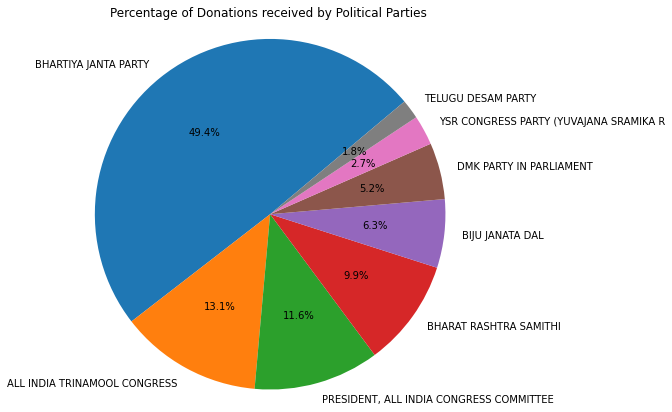

In [7]:
party_funds = recepient.groupby('Political Party')['Amount Received'].sum().reset_index()
total_amount_received = party_funds['Amount Received'].sum()
party_funds['Percentage'] = (party_funds['Amount Received'] / total_amount_received) * 100
party_funds = party_funds.sort_values(by = 'Percentage', ascending = False)
party_pie = party_funds.head(8)
plt.figure(figsize=(7, 7)) #Create pie chart
plt.pie(party_pie['Amount Received'], labels=party_pie['Political Party'], autopct='%1.1f%%', startangle=40, labeldistance=1.1)
plt.title('Percentage of Donations received by Political Parties')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

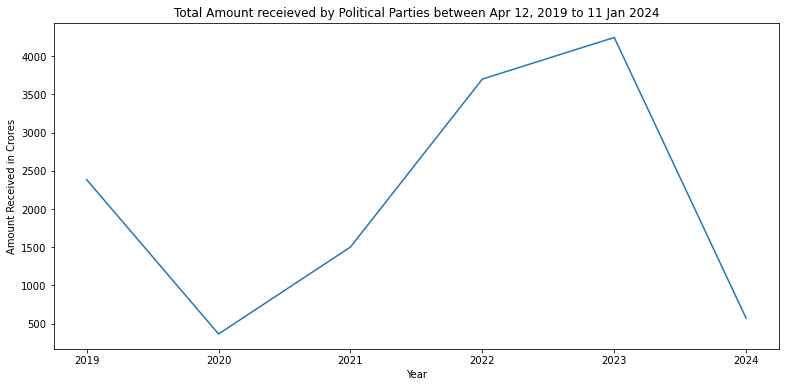

In [8]:
party_funds = recepient.groupby(['Date','Political Party']).sum().reset_index()
party_funds['Year'] = party_funds['Date'].dt.year
#Yearly funds received by year
yearly_funds_received = party_funds.groupby('Year')['Amount Received'].sum().reset_index()
#Converting the amount into crores
yearly_funds_received['Amount Received'] = yearly_funds_received['Amount Received']/10000000
#Plotting the lineplot
plt.figure(figsize = (13,6))
plt.title('Total Amount receieved by Political Parties between Apr 12, 2019 to 11 Jan 2024')
sns.lineplot(x= 'Year', y = 'Amount Received', data = yearly_funds_received)
plt.ylabel('Amount Received in Crores')
# Show the plot
plt.show()

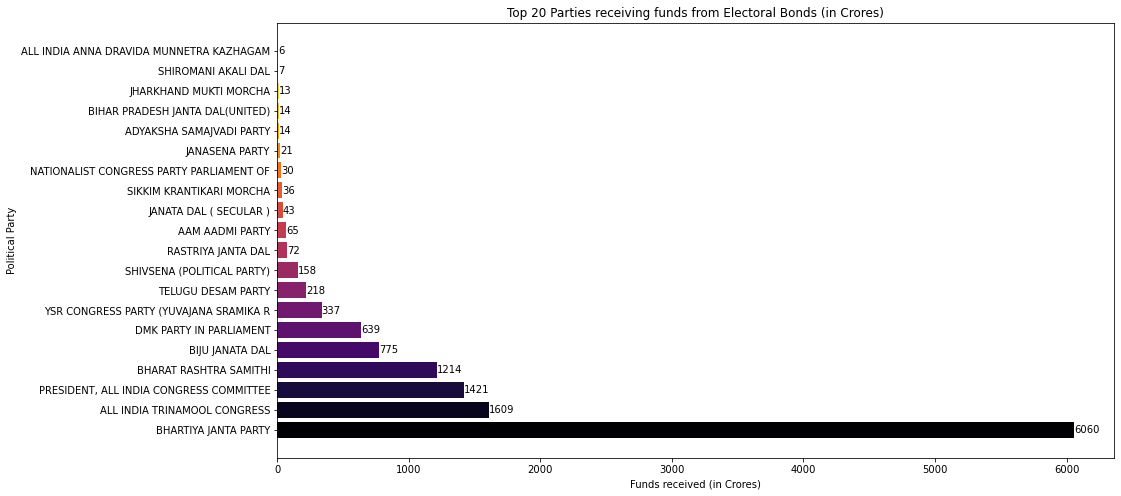

In [9]:
party_fundss = party_funds.groupby('Political Party')['Amount Received'].sum().reset_index()
party_fundss = party_fundss.sort_values(by = 'Amount Received', ascending = False)
party_fundss['Received Amount'] = party_fundss['Amount Received']/10000000
party_funds20 = party_fundss[['Political Party','Received Amount']]
top20 = party_funds20.head(20)
# Define the number of colors
num_colors = len(top20)
# Generate a range of colors using a gradient
colors = plt.cm.inferno(np.linspace(0, 1, num_colors))
plt.figure(figsize = (15,8))
barsss = plt.barh(top20['Political Party'],top20['Received Amount'], color = colors)
# Add labels for the bars
for bar, value in zip(barsss, top20['Received Amount']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(value)}',
             va='center', ha='left') 
plt.title("Top 20 Parties receiving funds from Electoral Bonds (in Crores)")
plt.xlabel("Funds received (in Crores)")
plt.ylabel('Political Party')
plt.show()

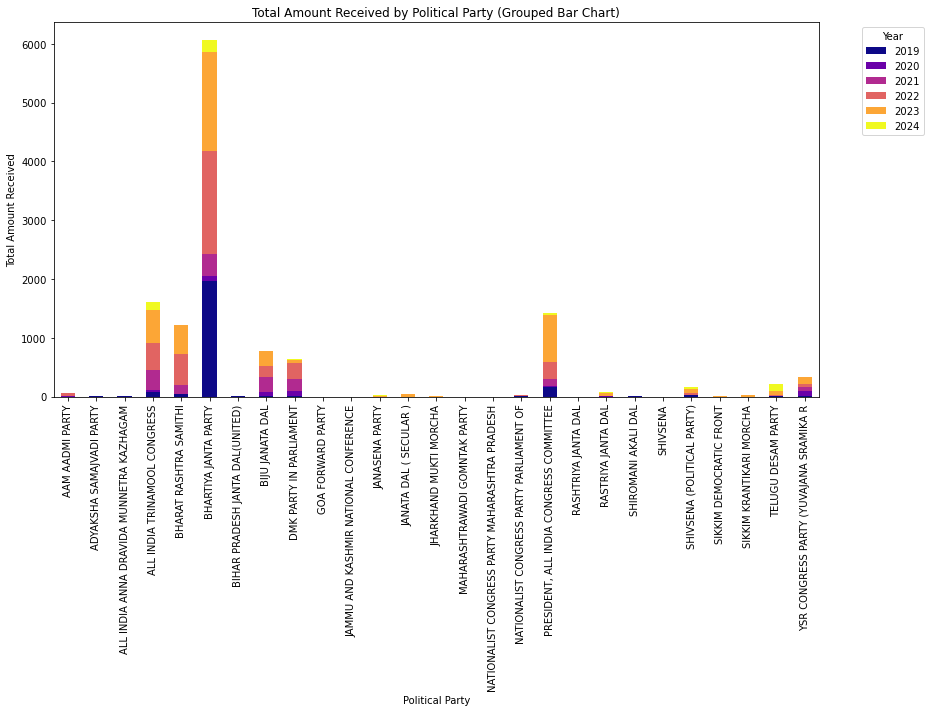

In [10]:
#New df, To create stacked barchart 
grouped_data = party_funds.groupby(['Political Party', 'Year'])['Amount Received'].sum().reset_index()
#New column Amount in crores
grouped_data['Received Amount'] = grouped_data['Amount Received']/10000000
# Pivot the data to have 'Year' as columns
pivoted_data = grouped_data.pivot(index='Political Party', columns='Year', values='Received Amount').fillna(0)
# Create the grouped bar chart
plt.figure(figsize=(13, 10))
pivoted_data.plot(kind='bar', stacked=True, colormap='plasma', ax=plt.gca())
plt.title('Total Amount Received by Political Party (Grouped Bar Chart)')
plt.xlabel('Political Party')
plt.ylabel('Total Amount Received')
plt.xticks(rotation=90)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

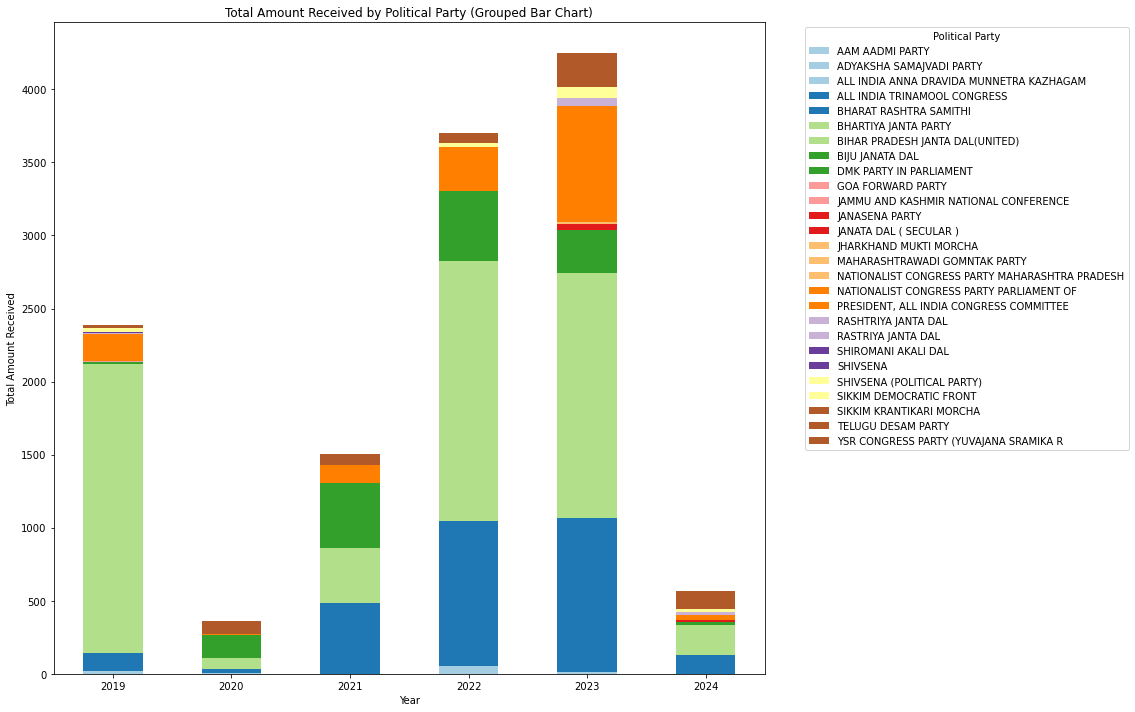

In [11]:
transposed_data = grouped_data.pivot(index='Year', columns='Political Party', values='Received Amount').fillna(0)
# Create the grouped bar chart
plt.figure(figsize=(16, 10))
transposed_data.plot(kind='bar', stacked=True, colormap='Paired', ax=plt.gca())
plt.title('Total Amount Received by Political Party (Grouped Bar Chart)')
plt.xlabel('Year')
plt.ylabel('Total Amount Received')
plt.xticks(rotation=0)  # Rotating x-ticks by 0 degrees (optional)
plt.legend(title='Political Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Denominations

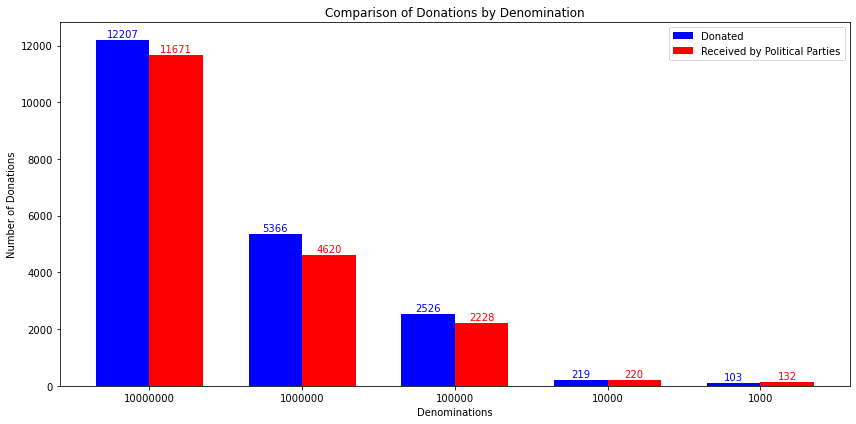

In [12]:
Denominations_Donor = Donors['Amount'].value_counts().reset_index()   #Value counts of Denominations donated by Purchaser
Denominations_Donor.columns = ['Denominations', 'No of Donations']  #Renaming columns
Denominations_party = recepient['Amount Received'].value_counts().reset_index()  #Value counts of Denominations received by Parties
Denominations_party.columns = ['Denominations', 'Donations_count']   #Renaming columns
con = pd.merge(Denominations_party, Denominations_Donor, on = 'Denominations', how='outer')  #Merging  donated & received denominations
# Plotting the data 
plt.figure(figsize=(12, 6))
bar_width = 0.35
bar_position = range(len(con))
plt.bar(bar_position, con['Donations_count'], bar_width, label='Donated', color='blue')
plt.bar([pos + bar_width for pos in bar_position], con['No of Donations'], bar_width, label='Received by Political Parties', color='red')
#labels for each bar
for i, (value1, value2) in enumerate(zip(con['Donations_count'], con['No of Donations'])):
    plt.text(i, value1 + 20, str(value1), ha='center', va='bottom', color='blue')
    plt.text(i + bar_width, value2 + 20, str(value2), ha='center', va='bottom', color='red')
# Add labels and title
plt.xlabel('Denominations')
plt.ylabel('Number of Donations')
plt.title('Comparison of Donations by Denomination')
plt.xticks([pos + bar_width / 2 for pos in bar_position], con['Denominations'])
plt.legend()
# Show the plot
plt.tight_layout()
plt.show()

# Donors

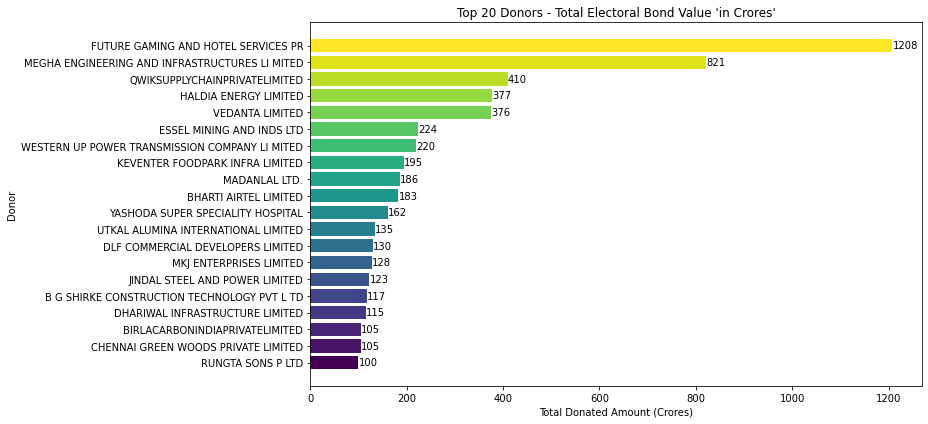

In [13]:
total_bought = Donors.groupby('Donor')['Amount'].sum().reset_index()
total_bought = total_bought.sort_values(by = 'Amount', ascending = False)
total_bought['Total_Bond_Value_in_Crores'] = round(total_bought['Amount']/10000000,0)
total_bought = total_bought.drop('Amount', axis = 1)
top20_value = total_bought.head(20)
top20_value = top20_value.sort_values(by = 'Total_Bond_Value_in_Crores', ascending = True)
# Define the number of colors
num_colors = len(top20)
# Generate a range of colors using a gradient
colors = plt.cm.viridis(np.linspace(0, 1, num_colors))
plt.figure(figsize=(13, 6))  # Adjust the figure size as needed
bars = plt.barh(top20_value['Donor'], top20_value['Total_Bond_Value_in_Crores'], color= colors)
# Add labels for the bars
for bar, value in zip(bars, top20_value['Total_Bond_Value_in_Crores']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(value)}',
             va='center', ha='left')
# Add title and axis labels
plt.title("Top 20 Donors - Total Electoral Bond Value 'in Crores'")
plt.xlabel('Total Donated Amount (Crores)')
plt.ylabel('Donor')
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

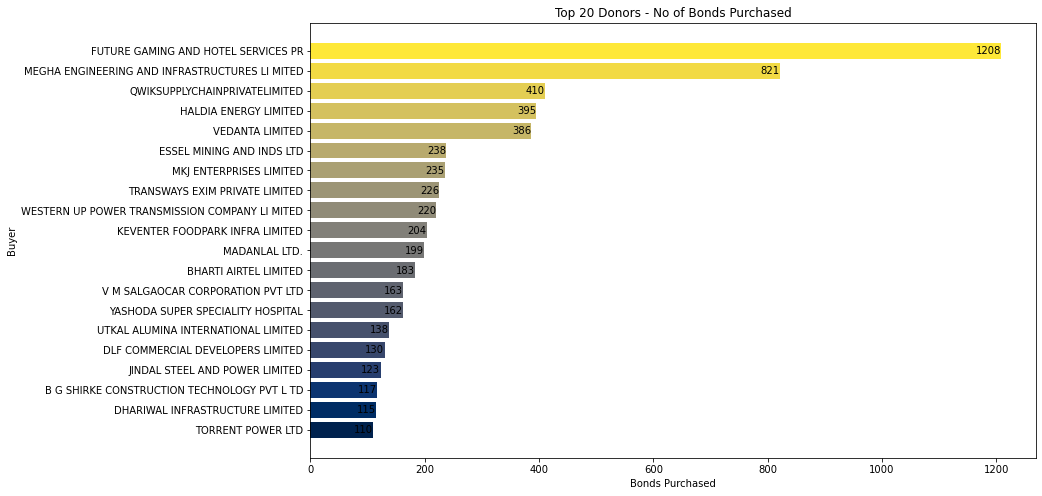

In [20]:
bonds_by_donor = Donors['Donor'].value_counts().reset_index() #Calculating No of Bonds bought by each Buyer
bonds_by_donor.columns = ['Donor','Bonds purchased'] #Renaming columns
bonds_by_donor = bonds_by_donor.sort_values(by = 'Bonds purchased', ascending = False) #Sorting the data
top20 = bonds_by_donor.head(20)  #New set - Top 20 Buyers w.r.to Bonds bought
top20 = top20.sort_values(by = 'Bonds purchased', ascending = True)    #Sorting the data
# Define the number of colors
num_colors = len(top20)
# Generate a range of colors using a gradient
colors = plt.cm.cividis(np.linspace(0, 1, num_colors))
plt.figure(figsize = (13,8))
barss = plt.barh(top20['Donor'],top20['Bonds purchased'], color = colors)
# Add labels for the bars
for bar, value in zip(barss, top20['Bonds purchased']):
    plt.text(bar.get_width() - 0.1, bar.get_y() + bar.get_height()/2, f'{int(value)}', 
             va='center', ha='right')  
plt.title("Top 20 Donors - No of Bonds Purchased")
plt.xlabel('Bonds Purchased')
plt.ylabel('Buyer')
plt.show()

# Average Monthly Donations

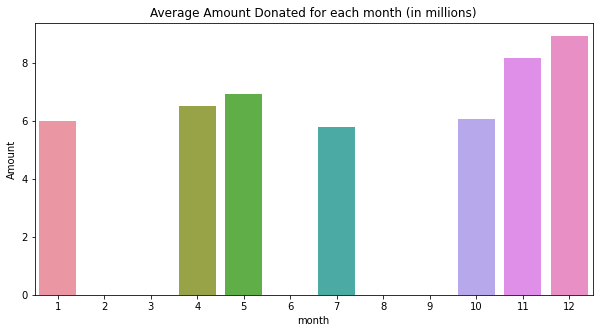

In [15]:
Donors['month'] = Donors.index.month
donation_by_month = Donors.groupby('month')['Amount'].mean().reset_index()
donation_by_month['Amount'] = donation_by_month['Amount']/1000000
donation_by_month.columns = ['month','Average Amount Donated (millions)']
donation_by_month.set_index('month', inplace = True)
donation_by_month_full = donation_by_month.reindex(range(1, 13))
#Plotting
plt.figure(figsize = (10,5))
sns.barplot(x=donation_by_month_full.index, y='Average Amount Donated (millions)', data=donation_by_month_full)
plt.title('Average Amount Donated for each month (in millions)')
plt.ylabel('Amount')
plt.show()

# Average Daily Donations

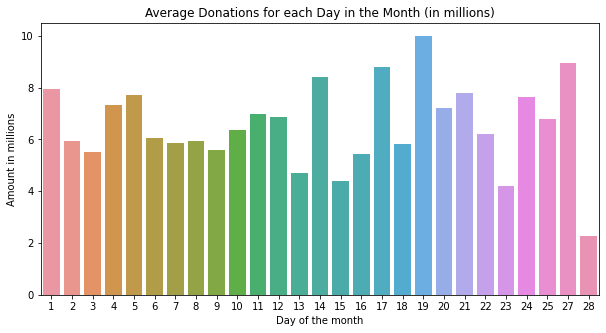

In [16]:
Donors['day'] = Donors.index.day
day = Donors[['Donor','Amount','day']]
donation_day = day.groupby('day')['Amount'].mean().reset_index()
donation_day['Amount'] = donation_day['Amount']/1000000

#Plot
plt.figure(figsize = (10,5))
plt.title("Average Donations for each Day in the Month (in millions)")
sns.barplot(x = 'day', y = 'Amount', data = donation_day)
plt.ylabel('Amount in millions')
plt.xlabel('Day of the month')
plt.show()

## Used Libraries



In [4]:
#importing the libraries
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [21]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.
